In [116]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import re
import matplotlib as mpl
from matplotlib import rc
import missingno as msno
import warnings
import datetime
warnings.filterwarnings('ignore')

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

In [117]:
X_train = pd.read_csv('X_train_08_1.csv').drop(columns='Unnamed: 0')
y_train = pd.read_csv('y_train_08_1.csv').drop(columns='Unnamed: 0')
X_test = pd.read_csv('X_test_08_1.csv').drop(columns='Unnamed: 0')
y_test = pd.read_csv('y_test_08_1.csv').drop(columns='Unnamed: 0')

In [118]:
total_df = pd.concat([X_train, y_train], axis=1)
total_df.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power',
       'director_movie_num', 'sequel', 'original', 'actor_power',
       'aud_nationwide'],
      dtype='object')

In [584]:
total_df.head(1)

,title,director,distributor,distributor_group,release_date,release_season,release,form,nation,screen,...,running_times,audience_rating,rating_audiences,realease_year,director_power,director_movie_num,sequel,original,actor_power,aud_nationwide
0,인사이드 아웃,피트 닥터,월트디즈니컴퍼니코리아(주),B,7/9/2015,summer,개봉영화,장편,미국,777,...,102,9.113006,938,2015,4968687.0,1 [1],0,0,14906061,4968687


In [585]:
X_train = total_df.drop(columns=['rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'type', 'release', 'form', 'realease_year', 'director_movie_num', 'aud_nationwide'])
y_train = total_df['aud_nationwide']



In [586]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# len(X_train), len(y_train), len(X_test), len(y_test)

In [588]:
len(X_train.columns)

19

In [589]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              740 non-null    object 
 1   director           740 non-null    object 
 2   distributor        740 non-null    object 
 3   distributor_group  740 non-null    object 
 4   release_date       740 non-null    object 
 5   release_season     740 non-null    object 
 6   nation             740 non-null    object 
 7   screen             740 non-null    int64  
 8   genre              740 non-null    object 
 9   rate               740 non-null    object 
 10  expert_rating      740 non-null    float64
 11  starring_actors    740 non-null    object 
 12  running_times      740 non-null    int64  
 13  audience_rating    740 non-null    float64
 14  rating_audiences   740 non-null    int64  
 15  director_power     740 non-null    float64
 16  sequel             740 non

In [590]:
df = pd.concat([X_train, y_train], axis=1)

In [591]:
df = df.reset_index().drop(columns='index')

In [592]:
import statsmodels.api as sm

model = sm.OLS.from_formula("aud_nationwide ~ distributor_group + release_season + nation + genre + rate + C(sequel) + C(original) + screen + expert_rating + audience_rating + running_times + rating_audiences + director_power + actor_power", data=df)
result = model.fit()



In [593]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     58.79
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          5.89e-186
Time:                        19:50:21   Log-Likelihood:                -11282.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     703   BIC:                         2.281e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [594]:
import matplotlib.pyplot as plt

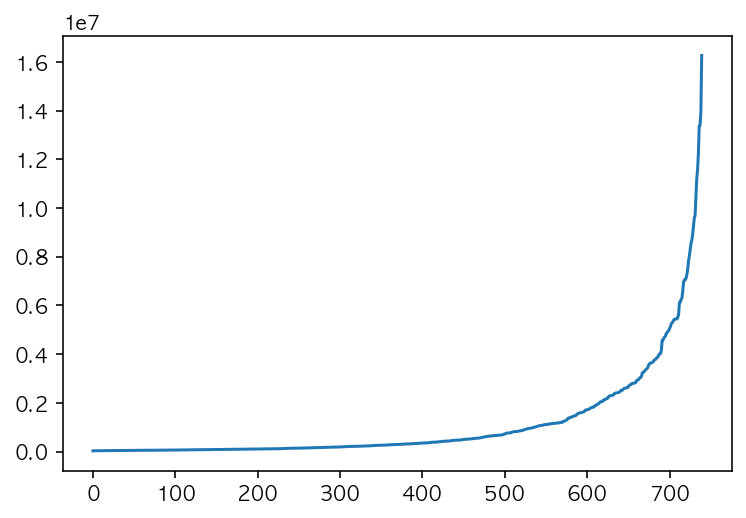

In [595]:
plt.plot(y_train.sort_values().reset_index(drop = True))
plt.show()

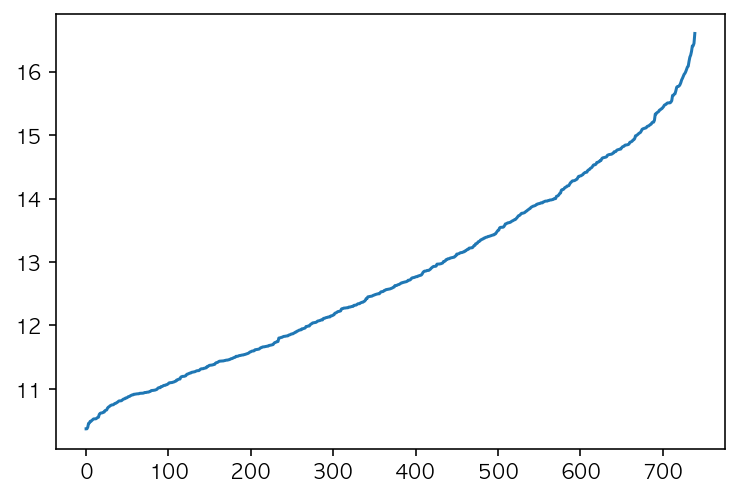

In [596]:
plt.plot(np.log(y_train.sort_values().reset_index(drop = True)))
plt.show()

# model2
- sequel컬럼 제거
- 종속변수에 Log 씌움


In [597]:
df.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'nation', 'screen', 'genre', 'rate', 'expert_rating',
       'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'director_power', 'sequel', 'original',
       'actor_power', 'aud_nationwide'],
      dtype='object')

In [598]:
df = df.drop(columns=['sequel'])
len(df.columns)

19

In [599]:
# df에서 title을 제외하고 14개의 독립변수 사용

feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power']
feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(original)']
model2 = sm.OLS.from_formula("np.log(aud_nationwide) ~" + "+".join(feature_names), data=df)
result2 = model2.fit()
print(result2.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(aud_nationwide)   R-squared:                       0.782
Model:                                OLS   Adj. R-squared:                  0.772
Method:                     Least Squares   F-statistic:                     72.29
Date:                    Wed, 01 Apr 2020   Prob (F-statistic):          2.60e-207
Time:                            19:50:25   Log-Likelihood:                -783.40
No. Observations:                     740   AIC:                             1639.
Df Residuals:                         704   BIC:                             1805.
Df Model:                              35                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [600]:
# release_season

# print(result2.t_test("Intercept = distributor_group[T.B]"))

In [601]:
# model2의 테스트 R
 
pred =  result2.predict(X_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
rss = ((np.log(y_test) - pred) ** 2).sum()
tss = ((np.log(y_test) - np.log(y_test).mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared



0.782391615036357

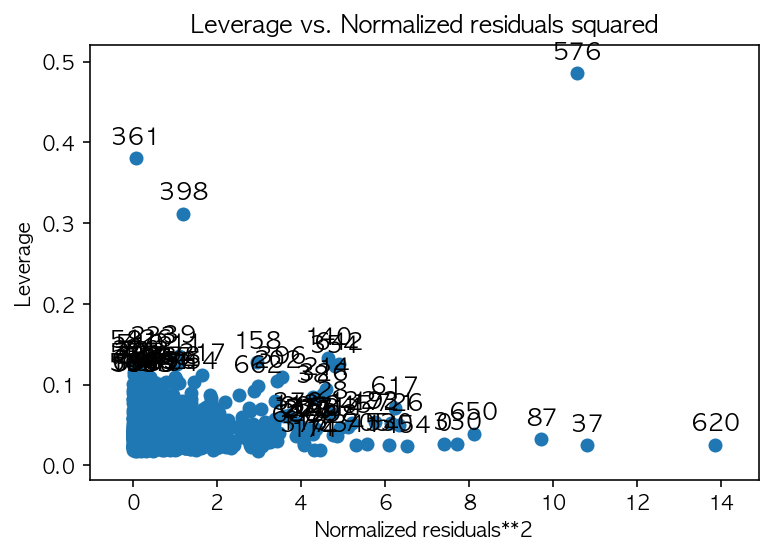

In [602]:
## Cook's distance

sm.graphics.plot_leverage_resid2(result2)
plt.show()

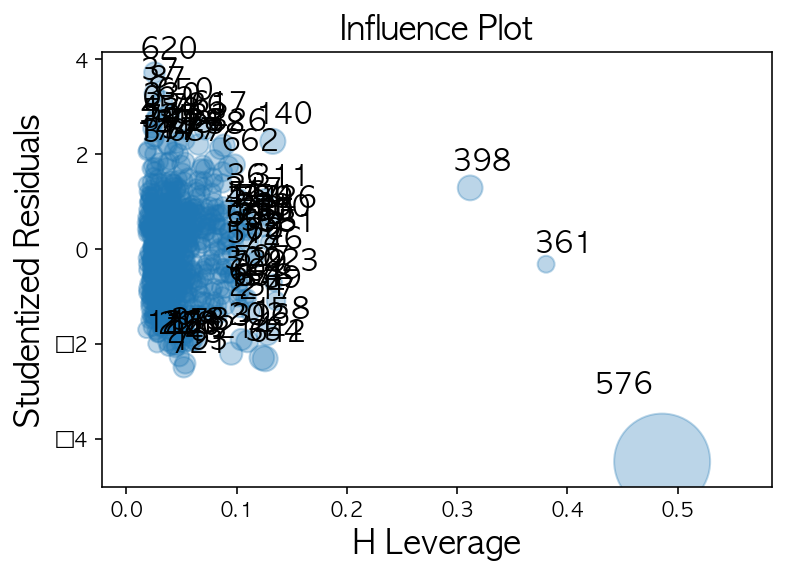

In [603]:
sm.graphics.influence_plot(result2, plot_alpha=0.3)
plt.show()

In [604]:
df.iloc[191]

title                     크레이지 리치 아시안
director                          존 추
distributor             워너브러더스 코리아(주)
distributor_group                   B
release_date               10/25/2018
release_season                 autumn
nation                             미국
screen                            531
genre                          멜로/로맨스
rate                         12세이상관람가
expert_rating                     6.5
starring_actors      콘스탄스 우,헨리 골딩,양자경
running_times                     120
audience_rating                7.9064
rating_audiences                  203
director_power            8.21044e+06
original                            1
actor_power                   3663164
aud_nationwide                 154297
Name: 191, dtype: object

In [605]:
# plt.scatter(df['audience_rating'], df['aud_nationwide'])
# plt.xlim((6, 10))

# model3
- 아웃라이어 제거: 
    - 어벤져스(마블) 576
    - 어벤져스(마블) 391
    - 캡틴 아메리카(마블) 398

In [606]:
df3 = df.copy()
len(df2.columns)

15

In [607]:
len(df3)

740

In [608]:
df3.drop(index=[576, 398, 361], inplace=True)

In [609]:
len(df3)

737

In [610]:
# df에서 title을 제외하고 14개의 독립변수 사용

feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power']
feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(original)']
model3 = sm.OLS.from_formula("np.log(aud_nationwide) ~" + "+".join(feature_names), data=df3)
result3 = model3.fit()
print(result3.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(aud_nationwide)   R-squared:                       0.786
Model:                                OLS   Adj. R-squared:                  0.776
Method:                     Least Squares   F-statistic:                     73.71
Date:                    Wed, 01 Apr 2020   Prob (F-statistic):          3.82e-209
Time:                            19:50:33   Log-Likelihood:                -766.89
No. Observations:                     737   AIC:                             1606.
Df Residuals:                         701   BIC:                             1771.
Df Model:                              35                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [611]:
# model3의 테스트 R
 
pred =  result3.predict(X_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
rss = ((np.log(y_test) - pred) ** 2).sum()
tss = ((np.log(y_test) - np.log(y_test).mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared


0.7884764192966445

In [612]:
# 시간을 카테고리화 하는 기준에 대한 근거 -> 나중에 생각
# 60~100, 100~140, 140~160

# plt.figure(figsize=(24, 12))
# sns.barplot(x="running_times", y="aud_nationwide", data=df3)
# plt.show()

In [613]:
# df3[df3['running_times'] > 80][df3[df3['running_times'] > 80]['running_times'] <= 100]

# model4
- running_time 컬럼을 카테고리화 시키기
- df3에서 러닝타임을 카테고리화시켜서 df4를 만든다
- 60 ~ 100 : A
- 100 ~ 140 : B
- 140 ~ : C

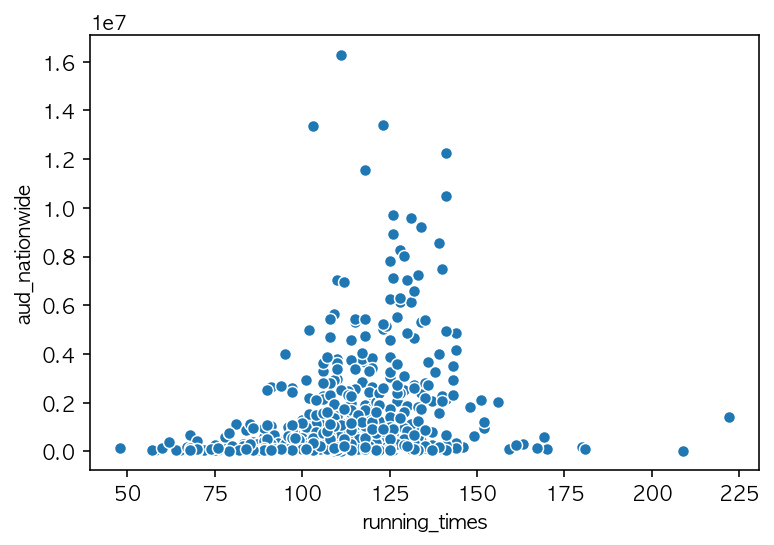

In [614]:
sns.scatterplot(x="running_times", y="aud_nationwide", data=df3)
plt.show()

In [615]:
df4 = df3.copy()

In [616]:
def R_func(time):
    if time < 100:
        return 'A'
    elif time >= 100 and time < 140:
        return 'B'
    else:
        return 'C'

In [617]:
df4['CAT_running_times'] = df3['running_times'].apply(R_func)

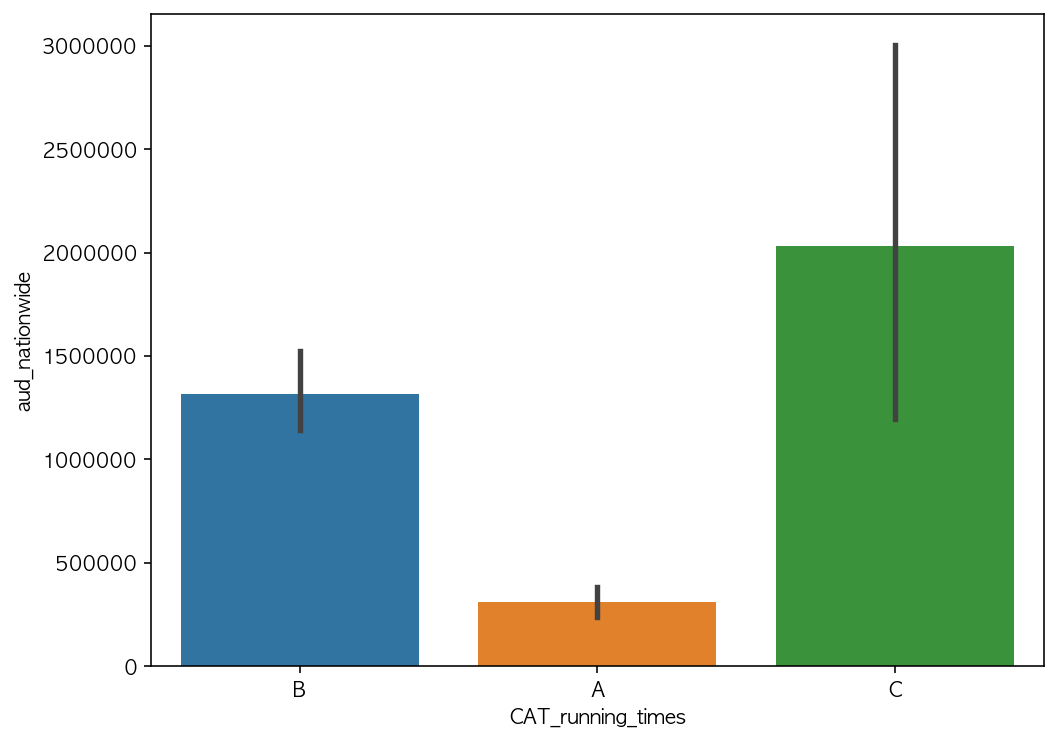

In [618]:
plt.figure(figsize=(8, 6))
sns.barplot(x="CAT_running_times", y="aud_nationwide", data=df4)
plt.show()

In [619]:
# df4 

feature_names = ['screen', 'expert_rating', 'audience_rating', 'rating_audiences', 'director_power', 'actor_power']
feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(original)', 'CAT_running_times']
model4 = sm.OLS.from_formula("np.log(aud_nationwide) ~" + "+".join(feature_names), data=df4)
result4 = model4.fit()
print(result4.summary())


                              OLS Regression Results                              
Dep. Variable:     np.log(aud_nationwide)   R-squared:                       0.791
Model:                                OLS   Adj. R-squared:                  0.780
Method:                     Least Squares   F-statistic:                     73.69
Date:                    Wed, 01 Apr 2020   Prob (F-statistic):          1.15e-211
Time:                            19:50:37   Log-Likelihood:                -758.39
No. Observations:                     737   AIC:                             1591.
Df Residuals:                         700   BIC:                             1761.
Df Model:                              36                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [620]:
X_test_CAT_r = X_test.copy()

In [621]:
X_test_CAT_r['CAT_running_times'] = X_test['running_times'].apply(R_func)

In [622]:
# model4의 테스트 R
 
pred =  result4.predict(X_test_CAT_r[['screen', 'expert_rating', 'audience_rating', 'CAT_running_times', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
rss = ((np.log(y_test) - pred) ** 2).sum()
tss = ((np.log(y_test) - np.log(y_test).mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared

0.7901284587304134

# model5
- expert_rating 카테고리화

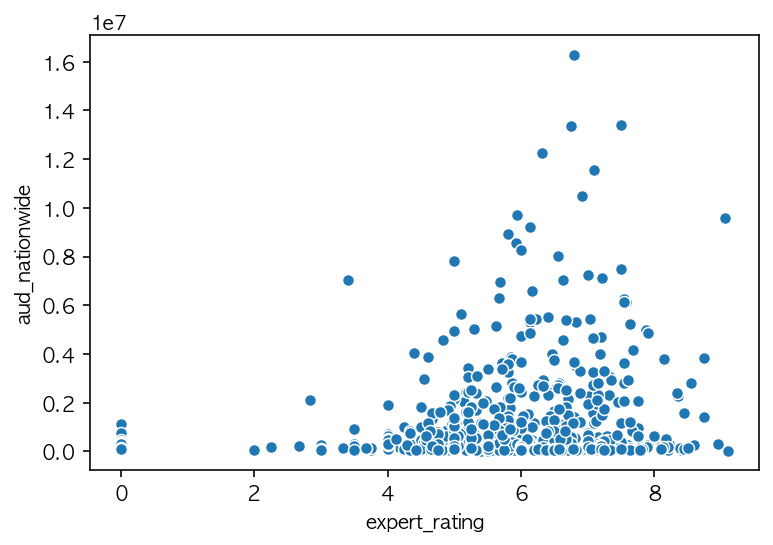

In [623]:
sns.scatterplot(x="expert_rating", y="aud_nationwide", data=df4)
plt.show()

In [624]:
df5 = df4.copy()

In [625]:
def EX_func(rating):
    if rating <= 3:
        return 'A'
    elif rating > 3 and rating <= 7:
        return 'B'
    else:
        return 'C'

In [626]:
df5['CAT_expert_rating'] = df4['expert_rating'].apply(EX_func)

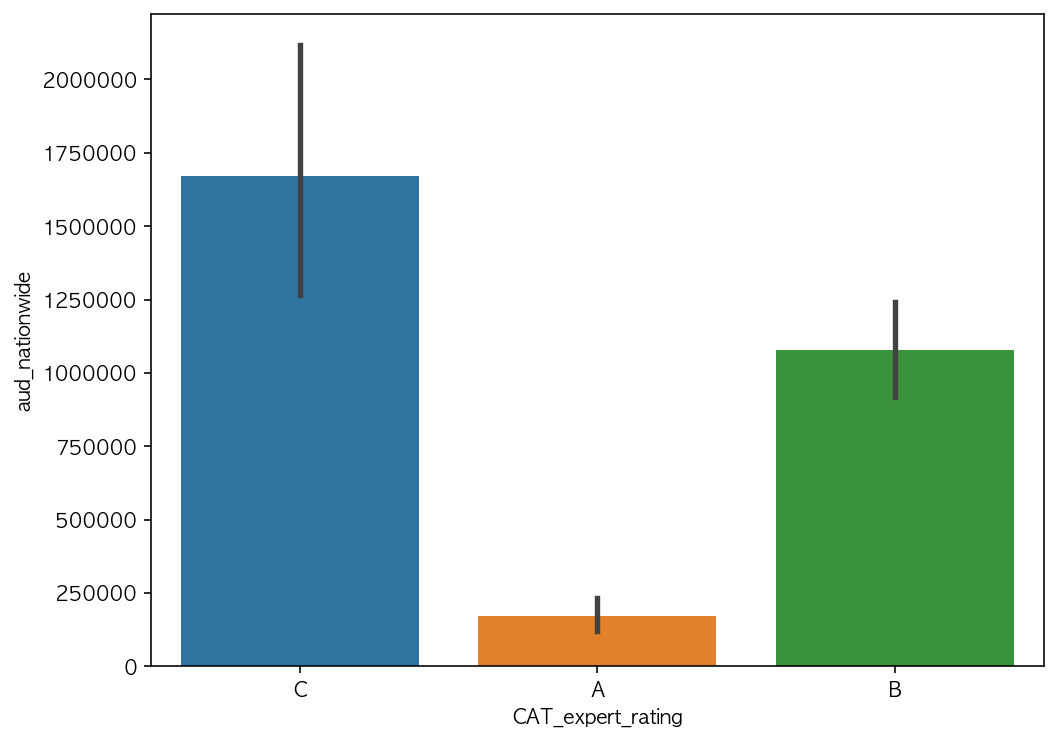

In [627]:
plt.figure(figsize=(8, 6))
sns.barplot(x="CAT_expert_rating", y="aud_nationwide", data=df5)
plt.show()

In [628]:
# df5 

feature_names = ['screen', 'audience_rating', 'rating_audiences', 'director_power', 'actor_power']
feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(original)', 'CAT_running_times', 'CAT_expert_rating']
model5 = sm.OLS.from_formula("np.log(aud_nationwide) ~" + "+".join(feature_names), data=df5)
result5 = model5.fit()
print(result5.summary())


                              OLS Regression Results                              
Dep. Variable:     np.log(aud_nationwide)   R-squared:                       0.794
Model:                                OLS   Adj. R-squared:                  0.784
Method:                     Least Squares   F-statistic:                     72.99
Date:                    Wed, 01 Apr 2020   Prob (F-statistic):          4.96e-213
Time:                            19:50:45   Log-Likelihood:                -752.73
No. Observations:                     737   AIC:                             1581.
Df Residuals:                         699   BIC:                             1756.
Df Model:                              37                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [629]:
X_test_CAT_Ex = X_test_CAT_r.copy()

In [630]:
X_test_CAT_Ex['CAT_expert_rating'] = X_test['expert_rating'].apply(EX_func)

In [631]:
# model5의 테스트 R
 
pred =  result5.predict(X_test_CAT_Ex[['screen', 'CAT_expert_rating', 'audience_rating', 'CAT_running_times', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
rss = ((np.log(y_test) - pred) ** 2).sum()
tss = ((np.log(y_test) - np.log(y_test).mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared


0.7943810300456379

In [632]:
df5_X = df5.drop(columns=['running_times', 'expert_rating'])
df5_y = df5['aud_nationwide']

In [633]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df5)):
    df_train = df5.iloc[idx_train]
    df_test = df5.iloc[idx_test]
    
    model = sm.OLS.from_formula("np.log(aud_nationwide) ~" + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred =  result.predict(df_test[['screen', 'CAT_expert_rating', 'audience_rating', 'CAT_running_times', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
    rss = ((np.log(y_test) - pred) ** 2).sum()
    tss = ((np.log(y_test) - np.log(y_test).mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))


학습 R2 = 0.79729306, 검증 R2 = 0.95453869
학습 R2 = 0.79660178, 검증 R2 = 0.95654730
학습 R2 = 0.80368409, 검증 R2 = 0.94170075
학습 R2 = 0.79392037, 검증 R2 = 0.97649538
학습 R2 = 0.79321273, 검증 R2 = 0.93535534


# model6
- audience_rating 카테고리화

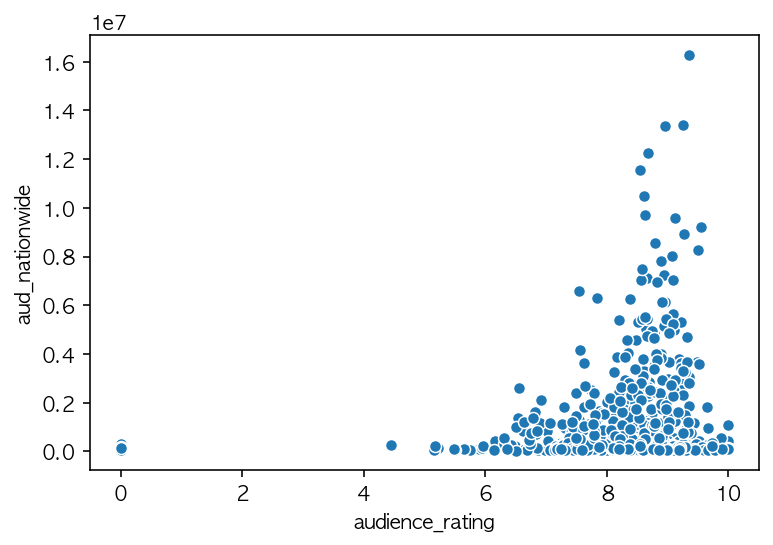

In [634]:
sns.scatterplot(x="audience_rating", y="aud_nationwide", data=df5)
plt.show()

In [635]:
df6 = df5.copy()

In [636]:
def AU_func(rating):
    if rating <= 4:
        return 'A'
    elif rating > 4 and rating <= 8:
        return 'B'
    else:
        return 'C'

In [637]:
df6['CAT_audience_rating'] = df5['audience_rating'].apply(AU_func)

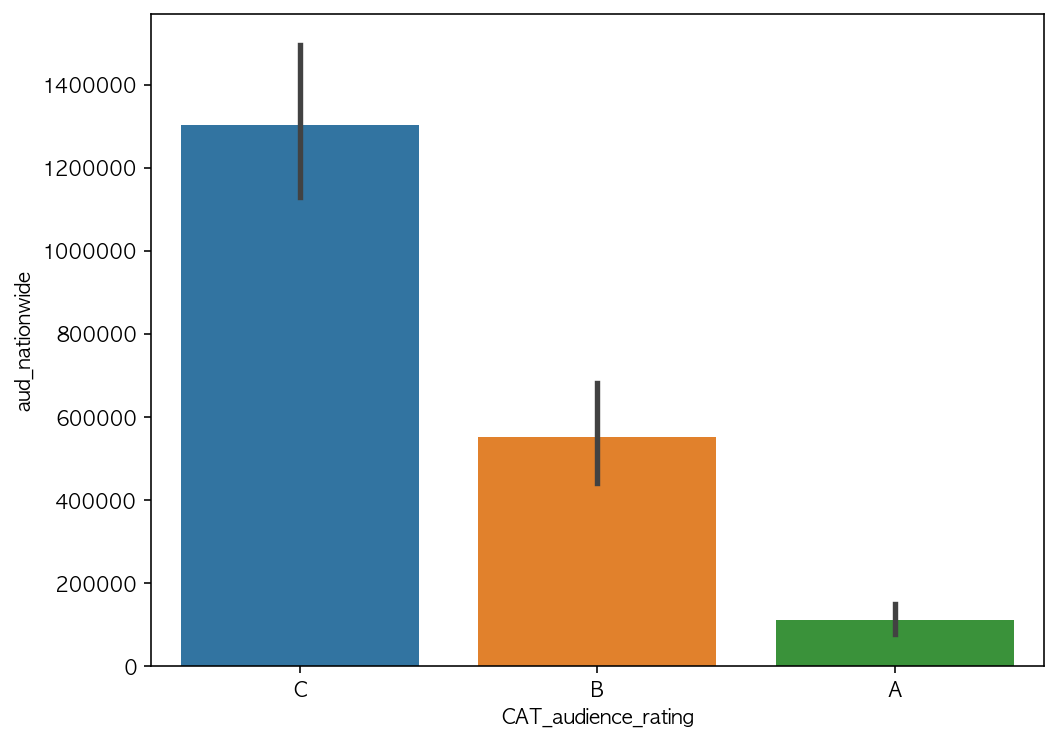

In [638]:
plt.figure(figsize=(8, 6))
sns.barplot(x="CAT_audience_rating", y="aud_nationwide", data=df6)
plt.show()

In [639]:
df6['log_aud_nationwide'] = df6['aud_nationwide'].apply(lambda score: np.log(score))

In [688]:
# df6

feature_names = ['screen', 'rating_audiences', 'director_power', 'actor_power']
feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(original)', 'CAT_running_times', 'CAT_expert_rating', 'CAT_audience_rating']
model6 = sm.OLS.from_formula("log_aud_nationwide ~" + "+".join(feature_names), data=df6)
result6 = model6.fit()
print(result6.summary())


                            OLS Regression Results                            
Dep. Variable:     log_aud_nationwide   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     72.97
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          2.10e-215
Time:                        20:02:29   Log-Likelihood:                -744.58
No. Observations:                 737   AIC:                             1567.
Df Residuals:                     698   BIC:                             1747.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [689]:
X_test_CAT_AU = X_test_CAT_Ex.copy()

In [690]:
X_test_CAT_AU['CAT_audience_rating'] = X_test['audience_rating'].apply(AU_func)

In [703]:
# model6의 테스트 R
 
pred =  result6.predict(X_test_CAT_AU[['screen', 'CAT_expert_rating', 'CAT_audience_rating', 'CAT_running_times', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
rss = ((np.log(y_test) - pred) ** 2).sum()
tss = ((np.log(y_test) - np.log(y_test).mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared


0.7904121083498

In [707]:
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df6)):
    df_train = df6.iloc[idx_train]
    df_test = df6.iloc[idx_test]
    
    model = sm.OLS.from_formula("log_aud_nationwide ~" + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred =  result.predict(df_test[['screen', 'CAT_expert_rating', 'CAT_audience_rating', 'CAT_running_times', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
    rss = ((df_test['log_aud_nationwide'] - pred) ** 2).sum()
    tss = ((df_test['log_aud_nationwide'] - df_test['log_aud_nationwide'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
    

학습 R2 = 0.80072913, 검증 R2 = 0.80038552
학습 R2 = 0.80600330, 검증 R2 = 0.74439433
학습 R2 = 0.80461203, 검증 R2 = 0.76680409
학습 R2 = 0.80462894, 검증 R2 = 0.76668093
학습 R2 = 0.80684674, 검증 R2 = 0.75109392
학습 R2 = 0.80509278, 검증 R2 = 0.75612237
학습 R2 = 0.80424240, 검증 R2 = 0.75213050
학습 R2 = 0.80820003, 검증 R2 = 0.65384984
학습 R2 = 0.79893138, 검증 R2 = 0.81589784
학습 R2 = 0.80309424, 검증 R2 = 0.78472473


In [645]:
# fig = plt.figure(figsize=(12, 80))
# sm.graphics.plot_partregress_grid(result6, fig=fig)
# fig.suptitle("")
# plt.show()

# model7
- 상호작용 독립변수 추가

In [699]:
df7 = df6.copy()

In [701]:
# df7

feature_names = ['screen', 'rating_audiences', 'director_power', 'actor_power', 'director_power*actor_power']
feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(original)', 'CAT_running_times', 'CAT_expert_rating', 'CAT_audience_rating']
model7 = sm.OLS.from_formula("log_aud_nationwide ~" + "+".join(feature_names), data=df7)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:     log_aud_nationwide   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     72.69
Date:                Wed, 01 Apr 2020   Prob (F-statistic):          2.71e-217
Time:                        20:10:11   Log-Likelihood:                -737.61
No. Observations:                 737   AIC:                             1555.
Df Residuals:                     697   BIC:                             1739.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [702]:
X_test_inter = X_test_CAT_AU.copy()

In [709]:
di_ac_inter = []

for index, row in X_test_inter.iterrows():
    di_ac_inter.append(row['director_power'] * row['actor_power'])

In [711]:
X_test_inter['director_power*actor_power'] = di_ac_inter

In [715]:
# model7의 테스트 R
 
pred =  result7.predict(X_test_inter[['screen', 'CAT_expert_rating', 'CAT_audience_rating', 'CAT_running_times', 'director_power*actor_power', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
rss = ((np.log(y_test) - pred) ** 2).sum()
tss = ((np.log(y_test) - np.log(y_test).mean()) ** 2).sum()
rsquared = 1 - rss/tss
rsquared


0.8021079729787276

In [717]:
from sklearn.model_selection import KFold

scores = np.zeros(10)
cv = KFold(10, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df7)):
    df_train = df7.iloc[idx_train]
    df_test = df7.iloc[idx_test]
    
    model = sm.OLS.from_formula("log_aud_nationwide ~" + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred =  result.predict(df_test[['screen', 'CAT_expert_rating', 'CAT_audience_rating', 'CAT_running_times', 'director_power*actor_power', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
    rss = ((df_test['log_aud_nationwide'] - pred) ** 2).sum()
    tss = ((df_test['log_aud_nationwide'] - df_test['log_aud_nationwide'].mean()) ** 2).sum()
    rsquared = 1 - rss/tss

    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
    

KeyError: "['director_power*actor_power'] not in index"

# model8
- df6 : 상호작용 변수 추가하기 전의 데이터프레임
- director_power 카테고리화?

In [693]:
df8 = df6.copy()

In [694]:
df8 = df8.reset_index(drop=True)

In [695]:
df8 = df8.reset_index()

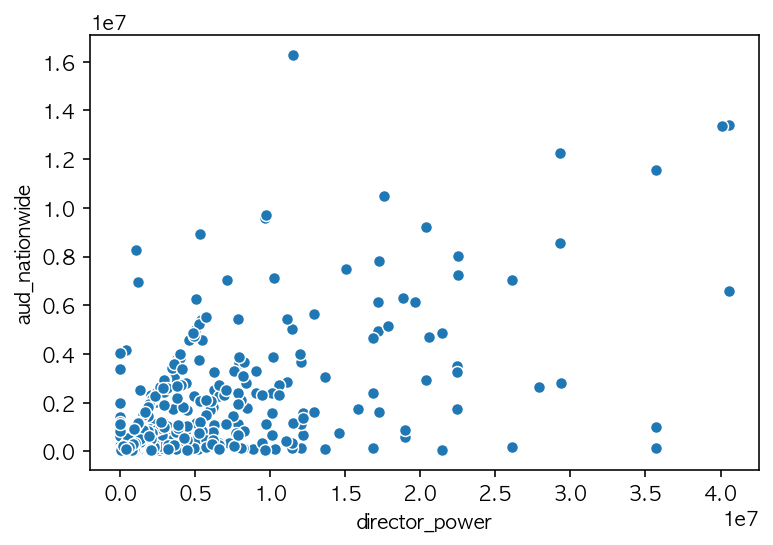

In [696]:
sns.scatterplot(x="director_power", y="aud_nationwide", data=df8)
plt.show()

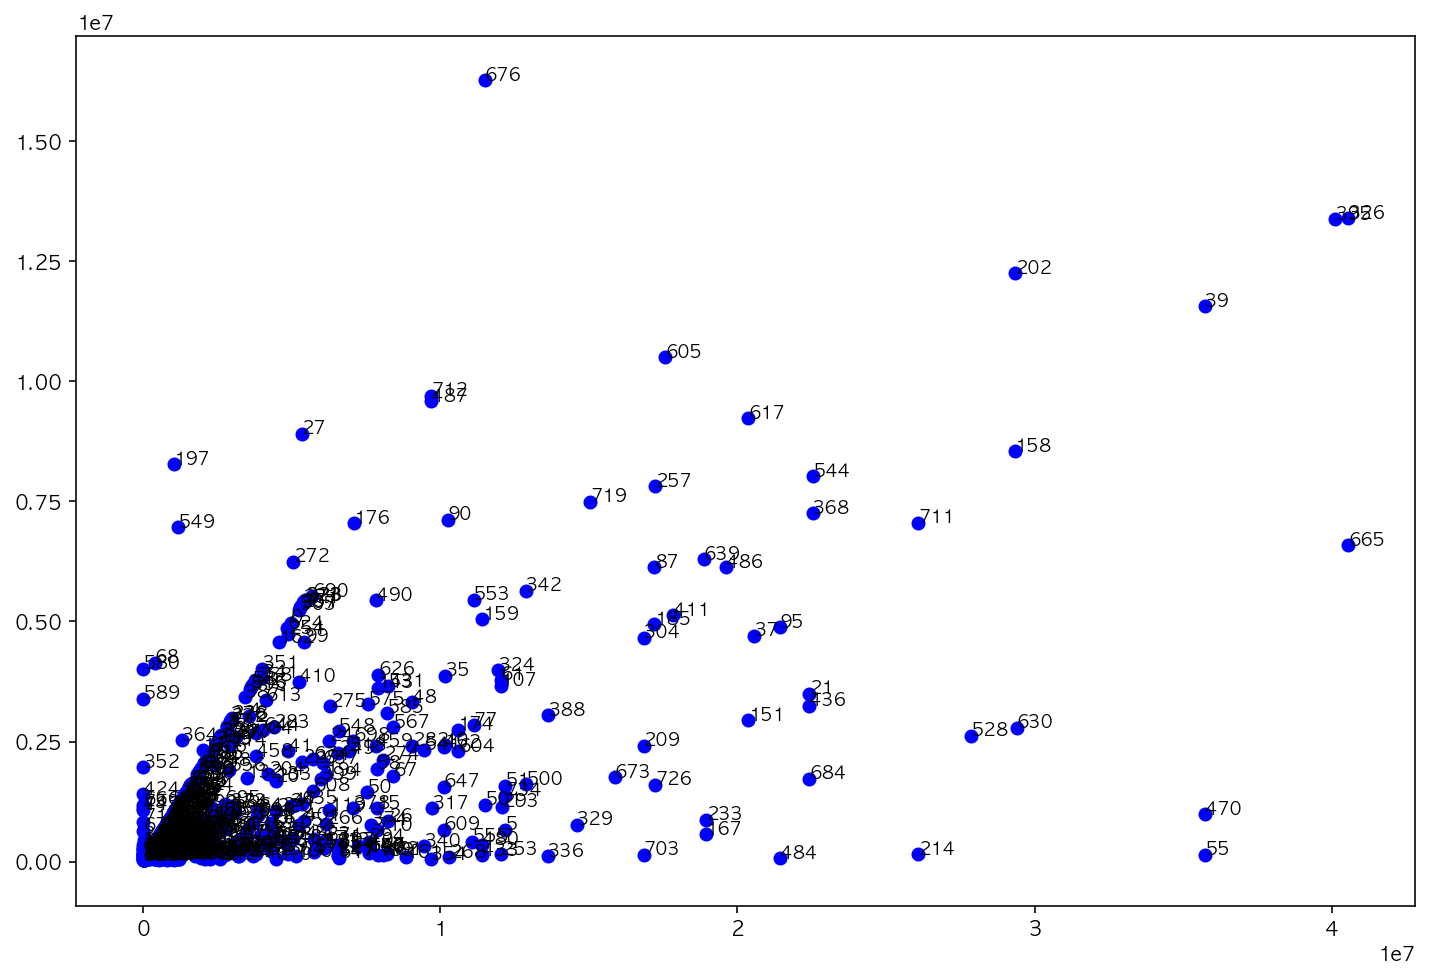

In [697]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

index = list(df8['index'])
x_cords = list(df8['director_power'])
y_cords = list(df8['aud_nationwide'])

for i, index in enumerate(index):
    x = x_cords[i]
    y = y_cords[i]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x + 0.4, y + 0.4, str(index), fontsize=9)
plt.show()

In [698]:
df8.iloc[676]

index                          676
title                         극한직업
director                       이병헌
distributor              씨제이이앤엠(주)
distributor_group                A
release_date             1/23/2019
release_season              winter
nation                          한국
screen                        1978
genre                          코미디
rate                      15세이상관람가
expert_rating                  6.8
starring_actors        류승룡,이하늬,진선규
running_times                  111
audience_rating            9.34614
rating_audiences              3279
director_power         1.15015e+07
original                         0
actor_power              358561995
aud_nationwide            16263360
CAT_running_times                B
CAT_expert_rating                B
CAT_audience_rating              C
log_aud_nationwide         16.6044
Name: 676, dtype: object

# 각각의 독립변수들 하나씩 별개로 OLS 

In [ ]:
# # df에서 title을 제외하고 14개의 독립변수 사용

# feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power']
# feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(original)']
# model2 = sm.OLS.from_formula("aud_nationwide ~" + "+".join(feature_names), data=df)
# result2 = model2.fit()
# print(result2.summary())



In [164]:
model_screen = sm.OLS.from_formula("aud_nationwide ~ scale(screen)", data=df)
result_screen = model_screen.fit()
print(result_screen.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     940.2
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          3.30e-124
Time:                        20:48:54   Log-Likelihood:                -9147.4
No. Observations:                 592   AIC:                         1.830e+04
Df Residuals:                     590   BIC:                         1.831e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.071e+06   5.12e+04     20.929

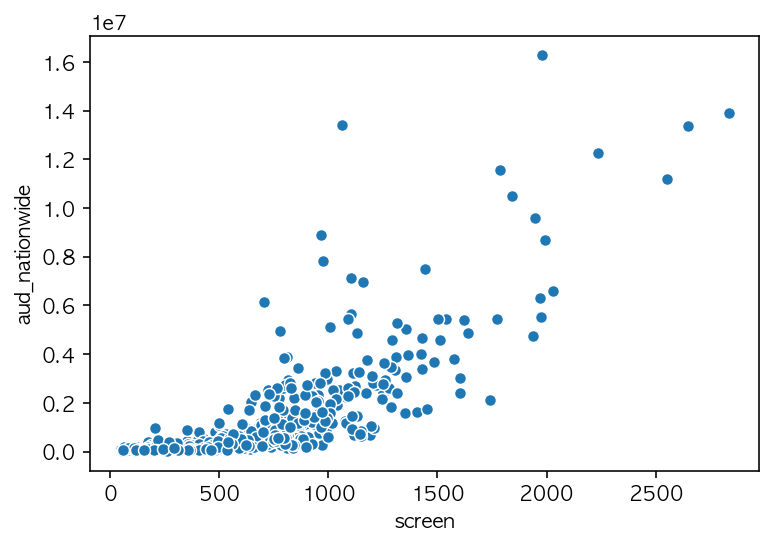

In [165]:
sns.scatterplot(x="screen", y="aud_nationwide", data=df)
plt.show()

In [166]:
model_actor_power = sm.OLS.from_formula("aud_nationwide ~ scale(actor_power)", data=df)
result_actor_power = model_actor_power.fit()
print(result_actor_power.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     276.5
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.32e-51
Time:                        20:49:24   Log-Likelihood:                -9315.8
No. Observations:                 592   AIC:                         1.864e+04
Df Residuals:                     590   BIC:                         1.864e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.071e+06    6.8

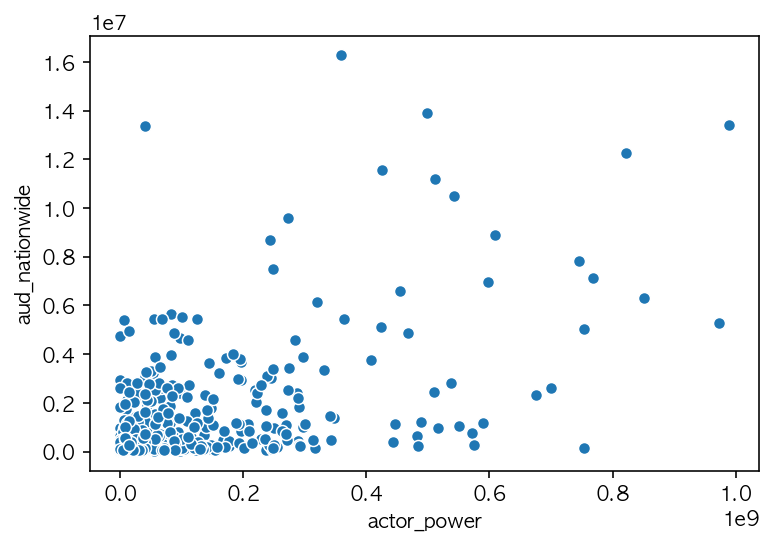

In [167]:
sns.scatterplot(x="actor_power", y="aud_nationwide", data=df)
plt.show()

### 모형의 진단과수정

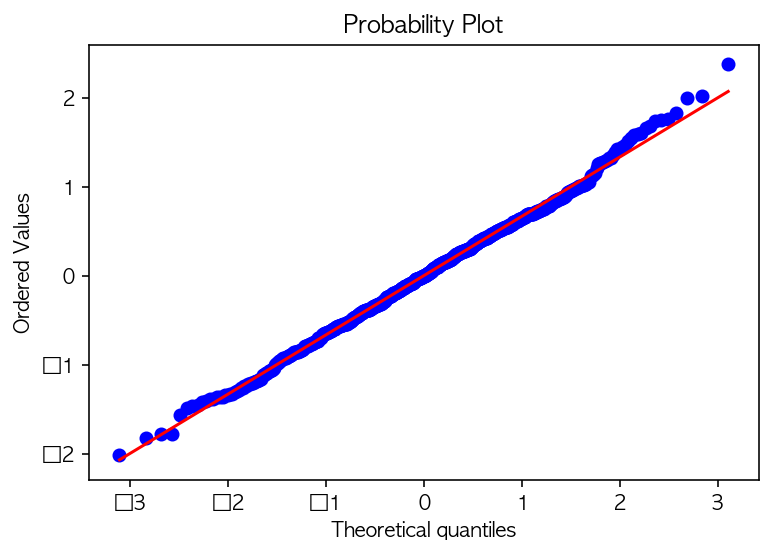

In [552]:
## 잔차 정규성 확인

sp.stats.probplot(result6.resid, plot=plt)
plt.show()